# Advanced NumPy Numpy高级应用

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)
plt.show()

## ndarray Object Internals

In [22]:
np.ones((10, 5)).shape
print(np.ones((10, 5)))

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [2]:
np.ones((3, 4, 5), dtype=np.float64).strides
#跨度元祖stride 前进到当前维度下一个元素需要‘跨过’的字节
#分别是[4*5*8(8个字节), 5*8 ,8]

(160, 40, 8)

### NumPy dtype Hierarchy numpy数据类型体系

In [5]:
ints = np.ones(10, dtype=np.uint16)
floats = np.ones(10, dtype=np.float32)
np.issubdtype(ints.dtype, np.integer)
np.issubdtype(floats.dtype, np.floating)

True

In [3]:
np.float64.mro()

[numpy.float64,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 float,
 object]

In [6]:
np.uint16.mro()

[numpy.uint16,
 numpy.unsignedinteger,
 numpy.integer,
 numpy.number,
 numpy.generic,
 object]

In [12]:
print(np.issubdtype(ints.dtype, np.number))
print(np.issubdtype(ints.dtype, object))
np.issubdtype(ints.dtype, np.generic)

True
False


True

## Advanced Array Manipulation 高级数组操作

### Reshaping Arrays 数组重塑

In [13]:
arr = np.arange(8)
arr
arr.reshape((4, 2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [17]:
print(arr.reshape((4, 2)).reshape((2, 4)))

[[0 1 2 3]
 [4 5 6 7]]


In [19]:
arr = np.arange(12)
print(arr.reshape((4,3), order="C")) #默认C order
arr.reshape((4,3), order="F") #可选Fortran

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [26]:
arr = np.arange(15)
arr.reshape((1,-4, 3)) # 可以给一个维度任意负值，数据自己会判断维度大小

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]]])

In [27]:
other_arr = np.ones((3, 5))
print(other_arr.shape)
arr.reshape(other_arr.shape)

(3, 5)


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [47]:
arr = np.arange(15).reshape((5, 3))
print(arr)
f = arr.flatten('F') # 扁平 副本
f[0] = 100
print(arr,f)
r = arr.ravel()#散开 返回源数组的视图
r[0] = 100
print(arr,r)


[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]] [100   3   6   9  12   1   4   7  10  13   2   5   8  11  14]
[[100   1   2]
 [  3   4   5]
 [  6   7   8]
 [  9  10  11]
 [ 12  13  14]] [100   1   2   3   4   5   6   7   8   9  10  11  12  13  14]


### C Versus Fortran Order C和Fortran顺序

In [ ]:
arr = np.arange(12).reshape((3, 4))
arr
arr.ravel()
arr.ravel('F')

### Concatenating and Splitting Arrays 数组的合并和拆分

In [48]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])
print(np.concatenate([arr1, arr2], axis=0))
np.concatenate([arr1, arr2], axis=1)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [49]:
print(np.vstack((arr1, arr2)))
np.hstack((arr1, arr2))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [51]:
np.hstack(arr1)

array([1, 2, 3, 4, 5, 6])

In [71]:
arr = np.random.randn(7, 7)
print(arr)
al = np.split(arr, [2,4,6])
# first, second, third = np.split(arr, [1, 3]) #0, [1:3], [3:5]
# first,second,third
al
# np.split?

[[-0.4003  0.4499  0.3996 -0.1516 -2.5579  0.1608  0.0765]
 [-0.2972 -1.2943 -0.8852 -0.1875 -0.4936 -0.1154 -0.3507]
 [ 0.0447 -0.8978  0.8909 -1.1512 -2.6123  1.1413 -0.8671]
 [ 0.3836 -0.437   0.3475 -1.2302  0.5711  0.0601 -0.2255]
 [ 1.3497  1.3503 -0.3867  0.866   1.7472 -1.4102 -0.3782]
 [-0.3458  0.3801  0.189   1.3233 -2.2646 -0.915  -0.479 ]
 [ 1.0472  0.9239 -0.1142  0.4058  0.2885 -0.4348  0.3588]]


[array([[-0.4003,  0.4499,  0.3996, -0.1516, -2.5579,  0.1608,  0.0765],
        [-0.2972, -1.2943, -0.8852, -0.1875, -0.4936, -0.1154, -0.3507]]),
 array([[ 0.0447, -0.8978,  0.8909, -1.1512, -2.6123,  1.1413, -0.8671],
        [ 0.3836, -0.437 ,  0.3475, -1.2302,  0.5711,  0.0601, -0.2255]]),
 array([[ 1.3497,  1.3503, -0.3867,  0.866 ,  1.7472, -1.4102, -0.3782],
        [-0.3458,  0.3801,  0.189 ,  1.3233, -2.2646, -0.915 , -0.479 ]]),
 array([[ 1.0472,  0.9239, -0.1142,  0.4058,  0.2885, -0.4348,  0.3588]])]

#### Stacking helpers: r_ and c_ 堆叠辅助类：r和c

In [72]:
arr = np.arange(6)
arr1 = arr.reshape((3, 2))
arr2 = np.random.randn(3, 2)
print(np.r_[arr1, arr2])    np.vstack((arr1, arr2))
np.c_[np.r_[arr1, arr2], arr] #np.hstack((ts, arr.reshape(6,1)))

[[ 0.      1.    ]
 [ 2.      3.    ]
 [ 4.      5.    ]
 [-0.3882  2.1287]
 [ 1.4096 -0.1054]
 [ 0.7004  2.0929]]


array([[ 0.    ,  1.    ,  0.    ],
       [ 2.    ,  3.    ,  1.    ],
       [ 4.    ,  5.    ,  2.    ],
       [-0.3882,  2.1287,  3.    ],
       [ 1.4096, -0.1054,  4.    ],
       [ 0.7004,  2.0929,  5.    ]])

In [113]:
np.c_[np.array([1,2,3])] #可以将(3,) 转化成(1,3)

array([[1],
       [2],
       [3]])

In [104]:

# np.hstack([1:6, -10:-5])
np.c_[1:6, -10:-5] 

SyntaxError: invalid syntax (<ipython-input-104-fb4390c47111>, line 1)

### Repeating Elements: tile and repeat 元素的重复操作：tile和repeat

In [121]:
arr = np.arange(3)
# arr.repeat(3)
arr, arr*3, arr.repeat(3)

(array([0, 1, 2]), array([0, 3, 6]), array([0, 0, 0, 1, 1, 1, 2, 2, 2]))

In [120]:
arr.repeat([2, 3, 4])

array([0, 0, 1, 1, 1, 2, 2, 2, 2])

In [127]:
arr = np.random.randn(2, 2)
print(arr)
arr.repeat(2), arr.repeat(2, axis=0) #axis不设置就扁平化了 因为默认是None不是0

[[-1.4957 -1.1749]
 [ 2.614  -0.6893]]


Docstring:
a.repeat(repeats, axis=None)

Repeat elements of an array.

Refer to `numpy.repeat` for full documentation.

See Also
--------
numpy.repeat : equivalent function
Type:      builtin_function_or_method


In [125]:
arr.repeat([2, 3], axis=0), arr.repeat([2, 3], axis=1)

(array([[-0.137 , -0.9305],
        [-0.137 , -0.9305],
        [ 0.3275,  1.303 ],
        [ 0.3275,  1.303 ],
        [ 0.3275,  1.303 ]]),
 array([[-0.137 , -0.137 , -0.9305, -0.9305, -0.9305],
        [ 0.3275,  0.3275,  1.303 ,  1.303 ,  1.303 ]]))

In [134]:
arr, np.tile(arr, 2) , np.tile(arr, (1,2))  #奇怪吧

(array([[-1.4957, -1.1749],
        [ 2.614 , -0.6893]]),
 array([[-1.4957, -1.1749, -1.4957, -1.1749],
        [ 2.614 , -0.6893,  2.614 , -0.6893]]),
 array([[-1.4957, -1.1749, -1.4957, -1.1749],
        [ 2.614 , -0.6893,  2.614 , -0.6893]]))

In [133]:
arr,       np.tile(arr, (2, 1)),       np.tile(arr, (3, 2))

(array([[-1.4957, -1.1749],
        [ 2.614 , -0.6893]]),
 array([[-1.4957, -1.1749],
        [ 2.614 , -0.6893],
        [-1.4957, -1.1749],
        [ 2.614 , -0.6893]]),
 array([[-1.4957, -1.1749, -1.4957, -1.1749],
        [ 2.614 , -0.6893,  2.614 , -0.6893],
        [-1.4957, -1.1749, -1.4957, -1.1749],
        [ 2.614 , -0.6893,  2.614 , -0.6893],
        [-1.4957, -1.1749, -1.4957, -1.1749],
        [ 2.614 , -0.6893,  2.614 , -0.6893]]))

### Fancy Indexing Equivalents: take and put 花式索引的等价函数：take和put

In [136]:
arr = np.arange(10) * 100
inds = [7, 1, 2, 6]
arr, arr[inds]

(array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900]),
 array([700, 100, 200, 600]))

In [138]:
arr.take(inds)
#array([700, 100, 200, 600])
arr.put(inds, 42)
print(arr)#array([  0, 42, 42, 300, 400, 500, 42, 42, 800, 900])
arr.put(inds, [40, 41, 42, 43])
arr       #array([  0, 41, 42, 300, 400, 500, 43, 40, 800, 900])

[  0  42  42 300 400 500  42  42 800 900]


array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

In [144]:
inds = [2, 0, 2, 1]
arr = np.random.randn(2, 4)
arr,   arr.take(inds, axis=1),   arr.take(inds) #这里axis是None

(array([[-1.0266,  1.2416, -0.1568, -2.4491],
        [-1.0339,  1.5995,  0.4741,  0.1513]]),
 array([[-0.1568, -1.0266, -0.1568,  1.2416],
        [ 0.4741, -1.0339,  0.4741,  1.5995]]),
 array([-0.1568, -1.0266, -0.1568,  1.2416]))

## Broadcasting 广播
广播（broadcasting）指的是不同形状的数组之间的算术运算的执行方式。它是一 种非常强大的功能，但也容易令人误解，即使是经验丰富的老手也是如此。将标量 值跟数组合并时就会发生最简单的广播

In [145]:
arr = np.arange(5)
arr
arr * 4

array([ 0,  4,  8, 12, 16])

In [165]:
arr = np.random.randn(4, 3)
print(arr, arr.mean(0), arr.mean(0).shape)
demeaned = arr - arr.mean(0)#增加.reshape(1,3)也可以
demeaned, demeaned.mean(0)

[[ 0.4008 -1.9462  0.505 ]
 [-0.9105 -0.2197  0.4081]
 [-0.6031 -0.3611  0.564 ]
 [-1.0566  1.392  -1.7613]] [-0.5424 -0.2838 -0.071 ] (3,)


(array([[ 0.9432, -1.6625,  0.5761],
        [-0.3681,  0.0641,  0.4791],
        [-0.0608, -0.0774,  0.6351],
        [-0.5143,  1.6757, -1.6902]]),
 array([ 0., -0.,  0.]))

In [168]:
print(arr)
row_means = arr.mean(1)
print(row_means, 
      row_means.shape, 
      row_means.reshape((4, 1)),
      np.c_[row_means],
      np.c_[row_means].shape == row_means.reshape((4, 1)).shape,
      np.c_[row_means] == row_means.reshape((4, 1)) #这两个情况相等
     )
demeaned = arr - row_means.reshape((4, 1))
demeaned, demeaned.mean(1)

[[ 0.4008 -1.9462  0.505 ]
 [-0.9105 -0.2197  0.4081]
 [-0.6031 -0.3611  0.564 ]
 [-1.0566  1.392  -1.7613]]
[-0.3468 -0.2407 -0.1334 -0.4753] (4,) [[-0.3468]
 [-0.2407]
 [-0.1334]
 [-0.4753]] [[-0.3468]
 [-0.2407]
 [-0.1334]
 [-0.4753]] True [[ True]
 [ True]
 [ True]
 [ True]]


(array([[ 0.7476, -1.5994,  0.8518],
        [-0.6698,  0.021 ,  0.6488],
        [-0.4697, -0.2277,  0.6974],
        [-0.5813,  1.8673, -1.286 ]]),
 array([ 0.,  0., -0., -0.]))

In [ ]:
(arr - np.c_[arr.mean(1)]).mean(1)

### Broadcasting Over Other Axes 沿其它轴向广播

In [175]:
arr = np.zeros((4, 4))
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [180]:
arr_3d = arr[:, np.newaxis, :]

arr_3d, arr[:,:,np.newaxis], arr[np.newaxis,:,:]

(array([[[0., 0., 0., 0.]],
 
        [[0., 0., 0., 0.]],
 
        [[0., 0., 0., 0.]],
 
        [[0., 0., 0., 0.]]]),
 array([[[0.],
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         [0.]]]),
 array([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]]))

In [181]:
arr_3d.shape, arr[:,:,np.newaxis].shape, arr[np.newaxis,:,:].shape

((4, 1, 4), (4, 4, 1), (1, 4, 4))

In [190]:
arr_1d = np.random.normal(size=3)
arr_1d, arr_1d.shape

(array([-0.9169, -0.0827, -1.9397]), (3,))

In [193]:
arr_1d[:, np.newaxis], arr_1d[:, np.newaxis].shape, np.c_[arr_1d], np.r_[arr_1d]

(array([[-0.9169],
        [-0.0827],
        [-1.9397]]),
 (3, 1),
 array([[-0.9169],
        [-0.0827],
        [-1.9397]]),
 array([-0.9169, -0.0827, -1.9397]))

In [192]:
arr_1d[np.newaxis, :], arr_1d[np.newaxis, :].shape

(array([[-0.9169, -0.0827, -1.9397]]), (1, 3))

In [196]:
arr = np.random.randn(3, 4, 5)
print(arr)
depth_means = arr.mean(2)
depth_means,  depth_means.shape
#(-0.4522 + 0.7582 -0.5156 -0.5912 + 0.8967)/5

[[[-0.4522  0.7582 -0.5156 -0.5912  0.8967]
  [-0.9714  1.8408  0.1539 -0.2741 -1.7849]
  [ 0.981  -0.8737 -1.0156 -0.4112  1.4656]
  [-1.0062 -0.9021  0.7528 -0.4905 -0.5247]]

 [[-0.6992  0.3524  0.0681 -0.9303  0.8454]
  [ 0.0165  0.845   1.8508  0.0221 -1.3692]
  [ 0.8872  0.0143 -0.0742 -0.0486  1.235 ]
  [-0.4333  1.391   0.8202 -0.2474  0.3023]]

 [[ 0.544  -0.9424 -1.2664  0.9372 -0.7201]
  [-1.594  -0.3755 -0.9587  0.7943 -1.6051]
  [ 0.5437  0.9252 -1.4696 -0.3996  1.4173]
  [-0.8976  1.8448  1.2532 -1.4909 -0.0277]]]


(array([[ 0.0192, -0.2072,  0.0292, -0.4342],
        [-0.0727,  0.273 ,  0.4028,  0.3666],
        [-0.2895, -0.7478,  0.2034,  0.1363]]),
 (3, 4))

In [204]:
demeaned = arr - depth_means[:, :, np.newaxis]
print(arr)
print(depth_means[:, :, np.newaxis], depth_means[:, :, np.newaxis].shape)  #3,4,1
demeaned, demeaned.shape, demeaned.mean(2)

[[[-0.4522  0.7582 -0.5156 -0.5912  0.8967]
  [-0.9714  1.8408  0.1539 -0.2741 -1.7849]
  [ 0.981  -0.8737 -1.0156 -0.4112  1.4656]
  [-1.0062 -0.9021  0.7528 -0.4905 -0.5247]]

 [[-0.6992  0.3524  0.0681 -0.9303  0.8454]
  [ 0.0165  0.845   1.8508  0.0221 -1.3692]
  [ 0.8872  0.0143 -0.0742 -0.0486  1.235 ]
  [-0.4333  1.391   0.8202 -0.2474  0.3023]]

 [[ 0.544  -0.9424 -1.2664  0.9372 -0.7201]
  [-1.594  -0.3755 -0.9587  0.7943 -1.6051]
  [ 0.5437  0.9252 -1.4696 -0.3996  1.4173]
  [-0.8976  1.8448  1.2532 -1.4909 -0.0277]]]
[[[ 0.0192]
  [-0.2072]
  [ 0.0292]
  [-0.4342]]

 [[-0.0727]
  [ 0.273 ]
  [ 0.4028]
  [ 0.3666]]

 [[-0.2895]
  [-0.7478]
  [ 0.2034]
  [ 0.1363]]] (3, 4, 1)


(array([[[-0.4714,  0.739 , -0.5348, -0.6104,  0.8776],
         [-0.7643,  2.048 ,  0.361 , -0.0669, -1.5778],
         [ 0.9518, -0.9029, -1.0448, -0.4405,  1.4364],
         [-0.5721, -0.468 ,  1.1869, -0.0564, -0.0905]],
 
        [[-0.6265,  0.4251,  0.1408, -0.8576,  0.9181],
         [-0.2566,  0.5719,  1.5778, -0.251 , -1.6422],
         [ 0.4844, -0.3884, -0.4769, -0.4513,  0.8323],
         [-0.7999,  1.0245,  0.4537, -0.614 , -0.0643]],
 
        [[ 0.8335, -0.6528, -0.9769,  1.2268, -0.4306],
         [-0.8462,  0.3723, -0.2109,  1.5421, -0.8573],
         [ 0.3403,  0.7218, -1.673 , -0.603 ,  1.2139],
         [-1.0339,  1.7085,  1.1168, -1.6273, -0.1641]]]),
 (3, 4, 5),
 array([[ 0.,  0.,  0., -0.],
        [-0., -0., -0.,  0.],
        [-0.,  0.,  0., -0.]]))

In [206]:
def demean_axis(arr, axis=0):
    means = arr.mean(axis)

    # This generalizes things like [:, :, np.newaxis] to N dimensions
    indexer = [slice(None)] * arr.ndim
    indexer[axis] = np.newaxis
    return arr - means[indexer]


demean_axis(arr)

<ipython-input-206-ec87c289fe15>:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return arr - means[indexer]


array([[[-0.2497,  0.7021,  0.0557, -0.3964,  0.5561],
        [-0.1218,  1.0707, -0.1948, -0.4549, -0.1985],
        [ 0.177 , -0.8956, -0.1625, -0.1248,  0.093 ],
        [-0.2272, -1.68  , -0.1893,  0.2524, -0.4413]],

       [[-0.4967,  0.2963,  0.6394, -0.7356,  0.5047],
        [ 0.8661,  0.0749,  1.5022, -0.1587,  0.2172],
        [ 0.0832, -0.0076,  0.779 ,  0.2379, -0.1376],
        [ 0.3457,  0.6131, -0.1218,  0.4955,  0.3856]],

       [[ 0.7465, -0.9984, -0.6951,  1.132 , -1.0608],
        [-0.7443, -1.1456, -1.3074,  0.6136, -0.0187],
        [-0.2603,  0.9032, -0.6165, -0.1131,  0.0447],
        [-0.1186,  1.0669,  0.3111, -0.748 ,  0.0556]]])

```python
def demean_axis(arr, axis=0):
    means = arr.mean(axis)

    # This generalizes things like [:, :, np.newaxis] to N dimensions
    indexer = [slice(None)] * arr.ndim
    indexer[axis] = np.newaxis
    return arr - means[indexer]
```

### Setting Array Values by Broadcasting 通过广播设置数组的值

In [207]:
arr = np.zeros((4, 3))
arr[:] = 5
arr

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [209]:
col = np.array([1.28, -0.42, 0.44, 1.6])
arr[:] = col[:, np.newaxis]
arr

array([[ 1.28,  1.28,  1.28],
       [-0.42, -0.42, -0.42],
       [ 0.44,  0.44,  0.44],
       [ 1.6 ,  1.6 ,  1.6 ]])

In [211]:
arr[:2]

array([[ 1.28,  1.28,  1.28],
       [-0.42, -0.42, -0.42]])

In [212]:
arr[:2] = [[-1.37], [0.509]]

ValueError: could not broadcast input array from shape (2) into shape (2,3)

In [214]:
np.array([[-1.37], [0.509]]).shape

(2, 1)

In [215]:
arr

array([[ 1.28,  1.28,  1.28],
       [-0.42, -0.42, -0.42],
       [ 0.44,  0.44,  0.44],
       [ 1.6 ,  1.6 ,  1.6 ]])

## Advanced ufunc Usage ufunc高级应用

### ufunc Instance Methods ufunc实例方法

In [218]:
arr = np.arange(10)
np.add.reduce(arr), arr.sum()

(45, 45)

In [ ]:
arr[::2].sort

In [227]:
np.random.seed(12346)  # for reproducibility
arr = np.random.randn(5, 5)
print(arr)
print(arr[::],arr[::].shape)
print(arr[::2],arr[::2].shape) # 2类似range里的step
arr[::2].sort(1) # sort a few rows 排序1,3,5行
print(arr[::2])
arr


[[-0.09    0.7594  0.7483 -0.9815  0.3658]
 [-0.3154 -0.8661  0.0279 -0.4556 -1.6019]
 [ 0.2483 -0.3215 -0.8487  0.0005 -0.5465]
 [ 0.2539  1.9368 -0.7995 -0.5692  0.0489]
 [-0.6491 -0.4795 -0.9535  1.4225  0.1754]]
[[-0.09    0.7594  0.7483 -0.9815  0.3658]
 [-0.3154 -0.8661  0.0279 -0.4556 -1.6019]
 [ 0.2483 -0.3215 -0.8487  0.0005 -0.5465]
 [ 0.2539  1.9368 -0.7995 -0.5692  0.0489]
 [-0.6491 -0.4795 -0.9535  1.4225  0.1754]] (5, 5)
[[-0.09    0.7594  0.7483 -0.9815  0.3658]
 [ 0.2483 -0.3215 -0.8487  0.0005 -0.5465]
 [-0.6491 -0.4795 -0.9535  1.4225  0.1754]] (3, 5)
[[-0.9815 -0.09    0.3658  0.7483  0.7594]
 [-0.8487 -0.5465 -0.3215  0.0005  0.2483]
 [-0.9535 -0.6491 -0.4795  0.1754  1.4225]]


array([[-0.9815, -0.09  ,  0.3658,  0.7483,  0.7594],
       [-0.3154, -0.8661,  0.0279, -0.4556, -1.6019],
       [-0.8487, -0.5465, -0.3215,  0.0005,  0.2483],
       [ 0.2539,  1.9368, -0.7995, -0.5692,  0.0489],
       [-0.9535, -0.6491, -0.4795,  0.1754,  1.4225]])

In [237]:
print(arr[:,:-1]) #每行到倒数第一列
print(arr[:, 1:]) 
arr[:, :-1] < arr[:, 1:]
print(arr[:, :-1] < arr[:, 1:])
np.logical_and.reduce(arr[:, :-1] < arr[:, 1:], axis=1)
print(np.logical_and.reduce(arr[:, :-1] < arr[:, 1:], axis=1)) #整行逻辑与 axis=1 
print(np.all(arr[:, :-1] < arr[:, 1:], axis=1))
#logical_and.reduce跟all方法是等价的

[[-0.9815 -0.09    0.3658  0.7483]
 [-0.3154 -0.8661  0.0279 -0.4556]
 [-0.8487 -0.5465 -0.3215  0.0005]
 [ 0.2539  1.9368 -0.7995 -0.5692]
 [-0.9535 -0.6491 -0.4795  0.1754]]
[[-0.09    0.3658  0.7483  0.7594]
 [-0.8661  0.0279 -0.4556 -1.6019]
 [-0.5465 -0.3215  0.0005  0.2483]
 [ 1.9368 -0.7995 -0.5692  0.0489]
 [-0.6491 -0.4795  0.1754  1.4225]]
[[ True  True  True  True]
 [False  True False False]
 [ True  True  True  True]
 [ True False  True  True]
 [ True  True  True  True]]
[ True False  True False  True]
[ True False  True False  True]


In [259]:
arr = np.arange(15).reshape((3, 5))
print(arr)
print(np.add.reduce(arr, axis=1))
print(np.sum(arr, axis=1))

print(np.cumsum(arr, axis=1))
print(np.add.accumulate(arr, axis=1))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[10 35 60]
[10 35 60]
[[ 0  1  3  6 10]
 [ 5 11 18 26 35]
 [10 21 33 46 60]]
[[ 0  1  3  6 10]
 [ 5 11 18 26 35]
 [10 21 33 46 60]]


In [262]:
arr = np.arange(3).repeat([1, 2, 2])

arr, np.arange(5), np.multiply.outer(arr, np.arange(5)), np.multiply(arr, np.arange(5))

(array([0, 1, 1, 2, 2]),
 array([0, 1, 2, 3, 4]),
 array([[0, 0, 0, 0, 0],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 2, 4, 6, 8],
        [0, 2, 4, 6, 8]]),
 array([0, 1, 2, 6, 8]))

In [267]:
x, y = np.random.randn(3, 4), np.random.randn(5)

result = np.subtract.outer(x, y)
print(x)
print(y)
print(result)
result.shape

[[ 0.5737  0.5605  0.2095 -0.8083]
 [ 0.8893  1.1924 -0.2881 -1.6406]
 [-1.6053 -1.2456 -1.0231  0.5297]]
[ 0.7745 -1.7123  0.7562 -1.4077 -0.8812]
[[[-0.2008  2.286  -0.1825  1.9814  1.4549]
  [-0.214   2.2728 -0.1957  1.9682  1.4417]
  [-0.565   1.9218 -0.5467  1.6172  1.0907]
  [-1.5828  0.9039 -1.5646  0.5993  0.0728]]

 [[ 0.1149  2.6016  0.1331  2.297   1.7705]
  [ 0.4179  2.9046  0.4361  2.6     2.0735]
  [-1.0626  1.4242 -1.0443  1.1196  0.5931]
  [-2.4151  0.0717 -2.3968 -0.2329 -0.7594]]

 [[-2.3798  0.107  -2.3615 -0.1976 -0.7241]
  [-2.0201  0.4667 -2.0018  0.1621 -0.3644]
  [-1.7976  0.6892 -1.7793  0.3846 -0.1419]
  [-0.2448  2.2419 -0.2266  1.9373  1.4108]]]


(3, 4, 5)

In [275]:
#add.reduce/add.reduceat/sum
arr = np.arange(10)
print(np.add.reduce(arr[0:5]), np.add.reduce(arr[5:8]), np.sum(arr[8:]))
np.add.reduceat(arr, [0, 5, 8])

10 18 17


array([10, 18, 17], dtype=int32)

In [276]:
arr = np.multiply.outer(np.arange(4), np.arange(5))
print(arr)
np.add.reduceat(arr, [0, 2, 4], axis=1)

[[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 0  2  4  6  8]
 [ 0  3  6  9 12]]


array([[ 0,  0,  0],
       [ 1,  5,  4],
       [ 2, 10,  8],
       [ 3, 15, 12]], dtype=int32)

### Writing New ufuncs in Python 编写新的ufunc 自定义

In [278]:
def add_elements(x, y):
    return x + y
add_them = np.frompyfunc(add_elements, 2, 1)
add_them(np.arange(8), np.arange(8)), add_them(np.arange(8), np.arange(8)).dtype

(array([0, 2, 4, 6, 8, 10, 12, 14], dtype=object), dtype('O'))

In [279]:
add_them = np.vectorize(add_elements, otypes=[np.float64])
add_them(np.arange(8), np.arange(8))
add_them(np.arange(8), np.arange(8)), add_them(np.arange(8), np.arange(8)).dtype

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]), dtype('float64'))

In [283]:
arr = np.random.randn(10000)
# %timeit add_them(arr, arr)
%timeit np.add(arr, arr)

2.97 µs ± 50.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Structured and Record Arrays 结构化和记录式数组

In [284]:
dtype = [('x', np.float64), ('y', np.int32)]
sarr = np.array([(1.5, 6), (np.pi, -2)], dtype=dtype)
sarr

array([(1.5   ,  6), (3.1416, -2)], dtype=[('x', '<f8'), ('y', '<i4')])

In [286]:
sarr[0], sarr[0]['x'], sarr[0]['y']

((1.5, 6), 1.5, 6)

In [291]:
sarr['x'], sarr

(array([1.5   , 3.1416]),
 array([(1.5   ,  6), (3.1416, -2)], dtype=[('x', '<f8'), ('y', '<i4')]))

### Nested dtypes and Multidimensional Fields 嵌套dtype和多维字段

In [298]:
dtype = [('x', np.int64, 3), ('y', np.int32)]
arr = np.zeros(4, dtype=dtype)
arr, arr.shape

(array([([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0)],
       dtype=[('x', '<i8', (3,)), ('y', '<i4')]),
 (4,))

In [294]:
arr[0]['x']

array([0, 0, 0], dtype=int64)

In [299]:
arr['x']

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int64)

In [301]:
dtype = [('x', [('a', 'f8'), ('b', 'f4')]), ('y', np.int32)]
data = np.array([((1, 2), 5), ((3, 4), 6)], dtype=dtype)
data['x'], data['y'], data['x']['a']

(array([(1., 2.), (3., 4.)], dtype=[('a', '<f8'), ('b', '<f4')]),
 array([5, 6]),
 array([1., 3.]))

### Why Use Structured Arrays? 为什么要用结构化数组
跟pandas的DataFrame相比，NumPy的结构化数组是一种相对较低级的工具。它 可以将单个内存块解释为带有任意复杂嵌套列的表格型结构。由于数组中的每个元 素在内存中都被表示为固定的字节数，所以结构化数组能够提供非常快速高效的磁 盘数据读写（包括内存映像）、网络传输等功能。 结构化数组的另一个常见用法是，将数据文件写成定长记录字节流，这是C和 C++代码中常见的数据序列化手段（业界许多历史系统中都能找得到）。只要知道 文件的格式（记录的大小、元素的顺序、字节数以及数据类型等），就可以用 np.fromfile将数据读入内存。这种用法超出了本书的范围，知道这点就可以了。

## More About Sorting 更多有关排序的话题

In [308]:
arr = np.random.randn(6)
arr, arr.sort(), arr   
#arr.sort()不返回数组，但是会修改数组

(array([-2.4024, -1.1814, -0.8991,  0.4374,  0.7864,  1.6401]),
 None,
 array([-2.4024, -1.1814, -0.8991,  0.4374,  0.7864,  1.6401]))

In [306]:
arr = np.random.randn(3, 5)
arr
arr[:, 1].sort()  # Sort first column values in-place
arr

array([[-0.1   , -1.0958, -0.6835, -1.4095, -0.1002],
       [-0.451 , -0.5049, -0.1167, -0.6777,  0.1794],
       [-1.2416,  2.7524, -0.1418,  0.478 , -0.0312]])

In [307]:
arr = np.random.randn(5)
arr, np.sort(arr), arr 
#np.sort不会修改数组本身，但是会返回一个排序的副本

(array([ 1.1015,  0.7699, -1.4849, -0.1203,  0.7086]),
 array([-1.4849, -0.1203,  0.7086,  0.7699,  1.1015]),
 array([ 1.1015,  0.7699, -1.4849, -0.1203,  0.7086]))

In [309]:
arr = np.random.randn(3, 5)
arr,arr.sort(axis=1), arr #行排序

(array([[-1.6011, -0.6982,  0.4462,  0.6889,  1.3671],
        [-1.0226, -0.5072, -0.2611,  0.5931,  0.8071],
        [-0.9761, -0.2464, -0.1686,  0.1061,  1.4123]]),
 None,
 array([[-1.6011, -0.6982,  0.4462,  0.6889,  1.3671],
        [-1.0226, -0.5072, -0.2611,  0.5931,  0.8071],
        [-0.9761, -0.2464, -0.1686,  0.1061,  1.4123]]))

In [310]:
arr[:, ::-1] #倒序的语法糖

array([[ 1.3671,  0.6889,  0.4462, -0.6982, -1.6011],
       [ 0.8071,  0.5931, -0.2611, -0.5072, -1.0226],
       [ 1.4123,  0.1061, -0.1686, -0.2464, -0.9761]])

### Indirect Sorts: argsort and lexsort 间接排序：argsort和lexsort

In [312]:
values = np.array([5, 0, 1, 3, 2])
indexer = values.argsort()#1,2,4,3,0

indexer, values[indexer]

(array([1, 2, 4, 3, 0], dtype=int64), array([0, 1, 2, 3, 5]))

In [317]:
arr = np.random.randn(3, 5)
arr[0] = values
arr, arr[:, arr[0].argsort()], arr[0].argsort()

(array([[ 5.    ,  0.    ,  1.    ,  3.    ,  2.    ],
        [-0.9134,  1.3138, -1.1886,  0.4285, -0.1708],
        [-1.5429, -0.1778, -2.2141, -0.3991,  1.0527]]),
 array([[ 0.    ,  1.    ,  2.    ,  3.    ,  5.    ],
        [ 1.3138, -1.1886, -0.1708,  0.4285, -0.9134],
        [-0.1778, -2.2141,  1.0527, -0.3991, -1.5429]]),
 array([1, 2, 4, 3, 0], dtype=int64))

In [ ]:
#字典序，就记住用last_name为主排序就完事了
irst_name = np.array(['Bob', 'Jane', 'Steve', 'Bill', 'Barbara'])
last_name = np.array(['Jones', 'Arnold', 'Arnold', 'Jones', 'Walters'])
sorter = np.lexsort((first_name, last_name))
sorter
zip(last_name[sorter], first_name[sorter])

### Alternative Sort Algorithms 其他供选择的排序算法

In [319]:
values = np.array(['2:first', '2:second', '1:first', '1:second',
                   '1:third'])
key = np.array([2, 2, 1, 1, 1])
indexer = key.argsort(kind='mergesort')

indexer, values.take(indexer)


(array([2, 3, 4, 0, 1], dtype=int64),
 array(['1:first', '1:second', '1:third', '2:first', '2:second'],
       dtype='<U8'))

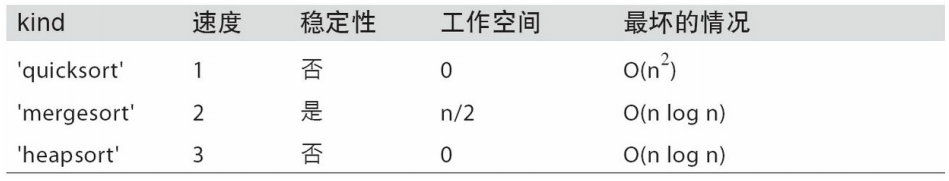

### Partially Sorting Arrays #部分排序数组
排序的目的之一可能是确定数组中最大或最小的元素。NumPy有两个优化方法， numpy.partition和np.argpartition，可以在第k个最小元素划分的数组

In [323]:
np.random.seed(12345)
arr = np.random.randn(20)
arr, np.partition(arr, 3) #3最小3个 ，-3最大三个

(array([-0.2047,  0.4789, -0.5194, -0.5557,  1.9658,  1.3934,  0.0929,
         0.2817,  0.769 ,  1.2464,  1.0072, -1.2962,  0.275 ,  0.2289,
         1.3529,  0.8864, -2.0016, -0.3718,  1.669 , -0.4386]),
 array([-1.2962, -0.4386, -0.5194, -0.5557, -0.3718, -2.0016, -0.2047,
         0.0929,  0.2289,  0.275 ,  0.2817,  0.4789,  0.8864,  0.769 ,
         1.0072,  1.2464,  1.3529,  1.3934,  1.669 ,  1.9658]))

In [321]:
indices = np.argpartition(arr, 3)
indices
arr.take(indices)

array([-2.0016, -1.2962, -0.5557, -0.5194, -0.3718, -0.4386, -0.2047,
        0.2817,  0.769 ,  0.4789,  1.0072,  0.0929,  0.275 ,  0.2289,
        1.3529,  0.8864,  1.3934,  1.9658,  1.669 ,  1.2464])

### numpy.searchsorted: Finding Elements in a Sorted Array 在有序数组中查找元素

In [ ]:
arr = np.array([0, 1, 7, 12, 15])
arr.searchsorted(9)

In [ ]:
arr.searchsorted([0, 8, 11, 16])

In [ ]:
arr = np.array([0, 0, 0, 1, 1, 1, 1])
arr.searchsorted([0, 1])
arr.searchsorted([0, 1], side='right') #默认左侧

In [325]:
data = np.floor(np.random.uniform(0, 10000, size=50))
bins = np.array([0, 100, 1000, 5000, 10000])
data, data.shape

(array([2449., 7928., 4951., 9150., 9453., 5332., 2524., 7208., 3674.,
        4986., 2265., 3535., 6508., 3129., 7687., 7818., 8524., 9499.,
        1073., 9107., 3360., 8263., 8981.,  427., 1957., 2945., 6269.,
         862., 1429., 5158., 6893., 8566., 6473., 5816., 7111., 2524.,
        9001., 4422.,  205., 9596., 6522., 5132., 6823., 4895., 9264.,
        5158.,  721., 5675., 6152., 9415.]),
 (50,))

In [326]:
labels = bins.searchsorted(data)
labels

array([3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 4, 3, 4,
       4, 2, 3, 3, 4, 2, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 2, 4, 4, 4, 4, 3,
       4, 4, 2, 4, 4, 4], dtype=int64)

In [ ]:
pd.Series(data).groupby(labels).mean()

## Writing Fast NumPy Functions with Numba  用Numba编写快速NumPy函数

In [3]:
import numpy as np

def mean_distance(x, y):
    nx = len(x)
    result = 0.0
    count = 0
    for i in range(nx):
        result += x[i] - y[i]
        count += 1
    return result / count

In [12]:
x = np.random.randn(10000000)
y = np.random.randn(10000000)
%timeit mean_distance(x, y)
# (x - y).mean()
# print(1)


4.63 s ± 26.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit (x - y).mean()

51.4 ms ± 2.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


```python
In [209]: x = np.random.randn(10000000)

In [210]: y = np.random.randn(10000000)

In [211]: %timeit mean_distance(x, y)
1 loop, best of 3: 2 s per loop

In [212]: %timeit (x - y).mean()
100 loops, best of 3: 14.7 ms per loop
```

In [14]:
import numba as nb
numba_mean_distance = nb.jit(mean_distance)
%timeit numba_mean_distance(x, y)
# @nb.jit
# def mean_distance(x, y):
#     nx = len(x)
#     result = 0.0
#     count = 0
#     for i in range(nx):
#         result += x[i] - y[i]
#         count += 1
#     return result / count

11.3 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


```python
In [213]: import numba as nb

In [214]: numba_mean_distance = nb.jit(mean_distance)
```

```python
@nb.jit
def mean_distance(x, y):
    nx = len(x)
    result = 0.0
    count = 0
    for i in range(nx):
        result += x[i] - y[i]
        count += 1
    return result / count
```

```python
In [215]: %timeit numba_mean_distance(x, y)
100 loops, best of 3: 10.3 ms per loop
```

In [15]:
import numba as nb
numba_mean_distance = nb.jit(mean_distance)


@nb.jit
def mean_distance(x, y):
    nx = len(x)
    result = 0.0
    count = 0
    for i in range(nx):
        result += x[i] - y[i]
        count += 1
    return result / count
%timeit numba_mean_distance(x, y)

11.2 ms ± 28.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


```python
from numba import float64, njit #=jit(nopython=True)

@njit(float64(float64[:], float64[:]))
def mean_distance(x, y):
    return (x - y).mean()
```

In [18]:
from numba import float64, njit, jit #=jit(nopython=True)

@njit(float64(float64[:], float64[:]))
def mean_distance(x, y):
    return (x - y).mean()


%timeit mean_distance(x, y)

51.4 ms ± 586 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Creating Custom numpy.ufunc Objects with Numba 用Numba创建自定义numpy.ufunc对象

```python
from numba import vectorize

@vectorize
def nb_add(x, y):
    return x + y
```

```python
In [13]: x = np.arange(10)

In [14]: nb_add(x, x)
Out[14]: array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.])

In [15]: nb_add.accumulate(x, 0)
Out[15]: array([  0.,   1.,   3.,   6.,  10.,  15.,  21.,  28.,  36.,  45.])
```

## Advanced Array Input and Output

### Memory-Mapped Files

In [23]:
mmap = np.memmap('mymmap', dtype='float64', mode='w+',
                 shape=(10000, 10000))
mmap, mmap.shape

OSError: [Errno 22] Invalid argument: 'mymmap'

In [20]:
section = mmap[:5]

In [24]:
section

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
section[:] = np.random.randn(5, 10000)
section[:] 
mmap.flush()
mmap
del mmap

In [30]:
mmap = np.memmap('mymmap', dtype='float64', shape=(10000, 10000))
mmap

memmap([[-1.98393981,  1.066688  ,  0.12685811, ...,  1.15509776,
          1.20660338, -0.65641293],
        [-0.72309074, -0.60534297,  0.10686104, ..., -0.10253203,
          0.11351388,  0.61852278],
        [ 0.61339775,  1.08632734,  0.66619388, ..., -0.54991449,
          1.23734735, -1.40012247],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

In [32]:
%xdel mmap
# !rm mymmap

NameError: name 'mmap' is not defined


### HDF5 and Other Array Storage Options

## Performance Tips

### The Importance of Contiguous Memory

In [39]:
arr_c = np.ones((1000, 1000), order='C')
arr_f = np.ones((1000, 1000), order='F')
print(arr_c.flags)
print(arr_f.flags)
arr_f.flags.f_contiguous, arr_c.flags.c_contiguous

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



(True, True)

In [38]:
%timeit arr_c.sum(1)
%timeit arr_f.sum(1)

831 µs ± 69.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
503 µs ± 27.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [44]:
arr_f.copy('C').flags, '-------', arr_f.flags

(  C_CONTIGUOUS : True
   F_CONTIGUOUS : False
   OWNDATA : True
   WRITEABLE : True
   ALIGNED : True
   WRITEBACKIFCOPY : False
   UPDATEIFCOPY : False,
 '-------',
   C_CONTIGUOUS : False
   F_CONTIGUOUS : True
   OWNDATA : True
   WRITEABLE : True
   ALIGNED : True
   WRITEBACKIFCOPY : False
   UPDATEIFCOPY : False)

In [48]:
arr_c[:50].flags.contiguous, arr_c[:, :50].flags


(True,
   C_CONTIGUOUS : False
   F_CONTIGUOUS : False
   OWNDATA : False
   WRITEABLE : True
   ALIGNED : True
   WRITEBACKIFCOPY : False
   UPDATEIFCOPY : False)

In [ ]:
%xdel arr_c
%xdel arr_f

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS